In [ ]:
import os
import requests
from PIL import Image
from io import BytesIO


In [ ]:
# Define your dataset requirements
dataset_path = 'sack_images/'
image_size = (224, 224)
annotations_file = 'annotations.csv'


In [ ]:
# Collect images
image_urls = ['https://st.depositphotos.com/1031223/3245/i/600/depositphotos_32451819-stock-photo-stacked-sugar-bag.jpg',
'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRC2jZ3ayVLhRfbzvyT5Tcl35tAC365DIcWBrARv2voouf5TAlZ-c-ahqYOpZt_4Cs7u-0&usqp=CAU',
'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRuYOUlll_S14gHoh8sW4iJuqY1qXrL9mgCkDNfJGQW1AqA_OOy0IYrJGQ2It6vhOGgSKo&usqp=CAU',
'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQ7hqdS8heGlbvMCmu5RU40P043PTp5ONK422QQq76o9VnrQdf22WGnwMWKlKaF_MLfpxc&usqp=CAU',
'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQbt0EdJAmYMK67aEPwqeD-mYj4I3aSnfn-lg&usqp=CAU',
'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTraWDxHChvgXtsv6dHoz2Gq_D5pkXdya88dA&usqp=CAU',
'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRt-05UOW9g8u_DQvwlkC_8uK456CA2I588Stgsx6nJ6IZm6TDOS5xMEh_12OAGqpU5GI4&usqp=CAU',
'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTRpLPfDyMqzYpnJ8wh4WAccM1ka_Ki2BCmj47naEI7fLIo6rRmCSdUcFVkDjZz0fsblKo&usqp=CAU',
'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQtlPtQYmPv2uCYDWQ9lDouXlCspAAkWMxz3Q&usqp=CAU',
'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRQp2jjUqVGyvRQKHW5y3BF2hS4hcY0i66v0Q&usqp=CAU',
'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSjVyKBef5wpYcu6RttCkJcdGeYciSEInsEZHFA04yW10der7ZfGoouz_Mp8ve5NrmjBXY&usqp=CAU',
'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQc5uQ8FsUb-Afb3LjQKLm1tgUW6usIDw7b0U9NGyD7EPzf5BlWrhKOEdOLEOoYfd2j328&usqp=CAU',
'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQsxHnaizrrZ5FAF0mKCEO9VFG4MMxlZTcsGApUKcj4cxHx2WcjcZZkZM-YLLWATgnPUVM&usqp=CAU',
'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcS6qvFLj9RK8NB73dqNmex2gCk0PUOPlC2bcCn0Lm89IBEdeOdGLD_5HWkUwYzjIZAUOzY&usqp=CAU',
'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSXLwxw5X2-vZ1KYT_mO2V-hzfhBqjmQHDgvdCCPKSq2HLR5sDkSyI_xduaFNLZch37fmQ&usqp=CAU',
'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRoWZ6cHeYPpISOYGQDXRJ3qV8KHE48vGGKiIZ6iGZe2eaRhUUxays4n9CDMNXHKIFLhjo&usqp=CAU',
'https://thumbs.dreamstime.com/b/bags-sugar-freight-trolley-211009763.jpg',
'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSZPSK1vc_IVFiCy_qVJPQ2cVxch3Xi-7rOOs5ZIG85q9yyPRwz6JKkSuSDwMovDuM8qrQ&usqp=CAU',
'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSckDz4KRVNvxSIN0VIbKBgxGMPb-QSNguIcBM3yjemZtkpUAFYh6Jt6KwzZI3A71MPlhM&usqp=CAU',
'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQX7qUEIVYmdLcJKlmsg-wDtnEjGcwBbhWrOg&usqp=CAU',
'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRRcyNT8neiDIOKFUzOxjdQ8xm3eT9efOfs8cA9IT0U5QsgF1BSZRZkRmMHxKo4GqNMkdo&usqp=CAU',
'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQN0UqyrLeOmeRbqPdENfofAqYmrma2NtCIb10wFy1YGUNG044vmKGXWxlf-Zf_yNeMUX8&usqp=CAU',
'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRlCfiIdTBlkH_VhZ4AjCmwPRH4U3wYSGdnwQBgnR-v359gwRV-KgPRGszakEj5RnNZppk&usqp=CAU',
'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSJTFo-sjy1-WEk5bYEAzbAFrIMW_3GYKwwM1UyCtb7EQre9aIhHLeOG4IJ8Xdxvu67ZNk&usqp=CAU',
'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQNA3BW8LuhzRR1089bWok7pC4xclgq0n43UA&usqp=CAU',
'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcS4Bi5D8Tjx6vN10gYjRscO0p_hsVdn7usKLQ&usqp=CAU'
]

In [ ]:
import requests
import os

# Create directory for images
if not os.path.exists('sack_images'):
    os.makedirs('sack_images')

# Download images and save to directory
for i, url in enumerate(image_urls):
    response = requests.get(url)
    with open(f'sack_images/sack_{i}.jpg', 'wb') as f:
        f.write(response.content)


In [ ]:
# Annotate images
annotations = []
for i in range(len(image_urls)):
    # You can use a GUI annotation tool like Labelbox here instead
    # For simplicity, we will just use a dummy annotation
    filename = f'sack_{i}.jpg'
    label = 'sack'
    annotations.append({'filename': filename, 'label': label})


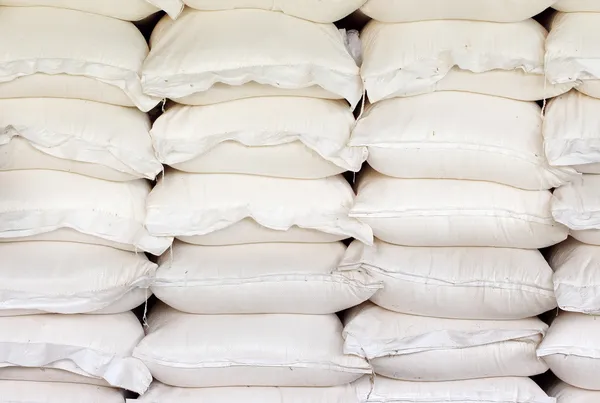

sack


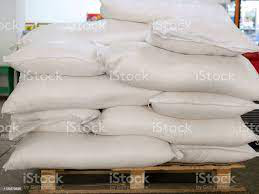

sack


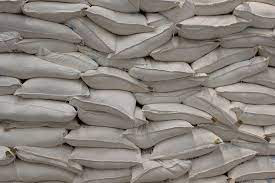

sack


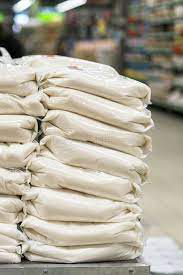

sack


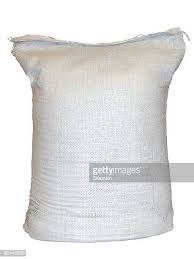

sack


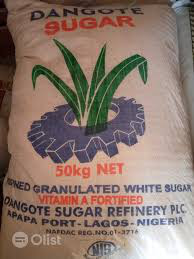

sack


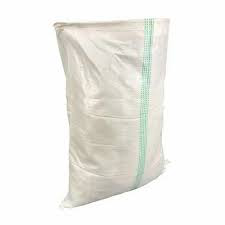

sack


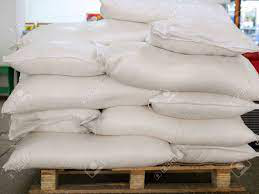

sack


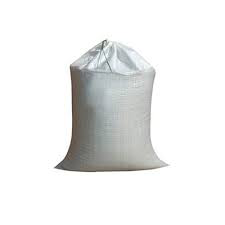

sack


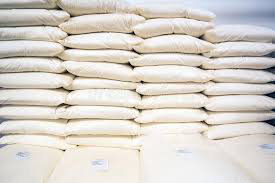

sack


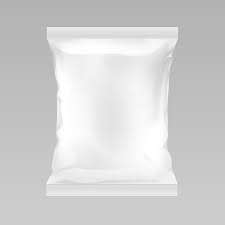

sack


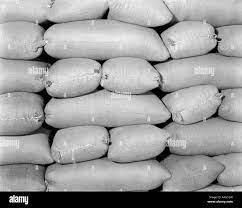

sack


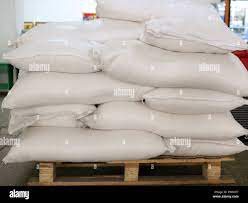

sack


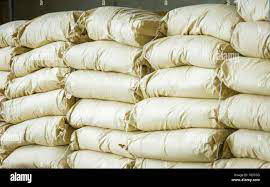

sack


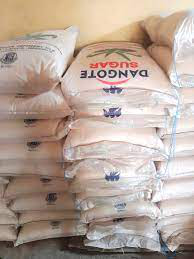

sack


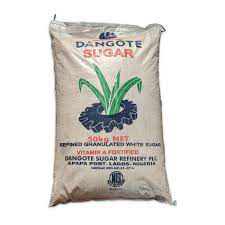

sack


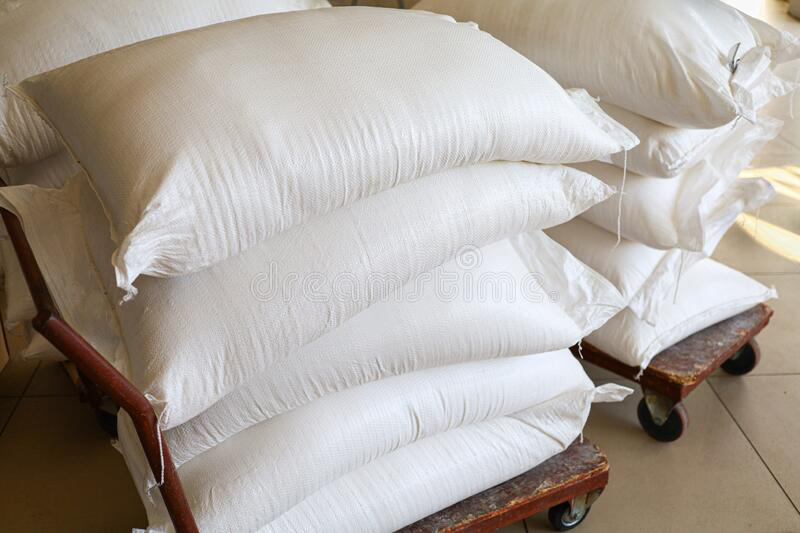

sack


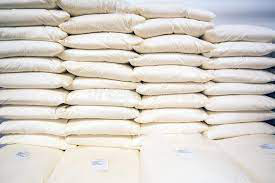

sack


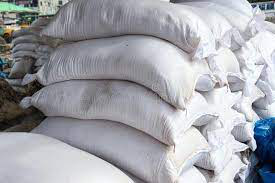

sack


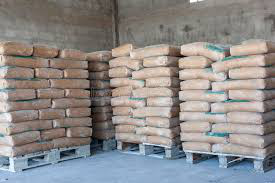

sack


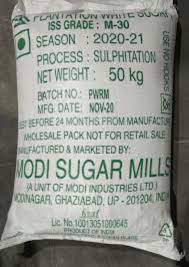

sack


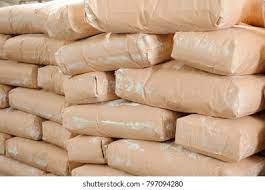

sack


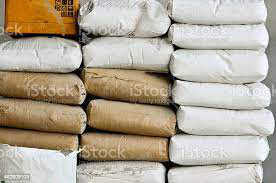

sack


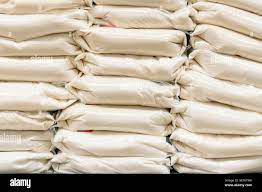

sack


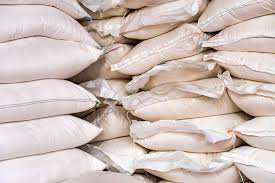

sack


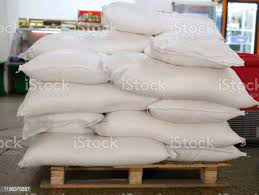

sack


In [ ]:
# Verify annotations
for annotation in annotations:
    img = Image.open(os.path.join(dataset_path, annotation['filename']))
    # Display the image and label for manual verification
    img.show()
    print(annotation['label'])


In [ ]:
# Export dataset
with open(os.path.join(dataset_path, annotations_file), 'w') as f:
    f.write("filename,label\n")  # Write the header
    for annotation in annotations:
        f.write(f"{annotation['filename']},{annotation['label']}\n")